Projeto de mineração de dados

Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

Descrição da base de dados obtida pelo link acima:

O conjunto de dados Sleep Health and Lifestyle compreende 400 linhas e 13 colunas, cobrindo uma ampla gama de variáveis ​​relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.



Colunas do conjunto de dados:

ID da pessoa: Um identificador para cada indivíduo.
Gênero: O gênero da pessoa (masculino/feminino).
Idade: A idade da pessoa em anos.
Ocupação: A ocupação ou profissão da pessoa.
Duração do sono (horas): O número de horas que a pessoa dorme por dia.
Qualidade do sono (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.
Nível de atividade física (minutos/dia): O número de minutos que a pessoa se envolve em atividade física diariamente.
Nível de estresse (escala: 1-10): Uma classificação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
Categoria do IMC: A categoria do IMC da pessoa (por exemplo, Abaixo do peso, Normal, Acima do peso).
Pressão arterial (sistólica/diastólica): A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
Frequência cardíaca (bpm): A frequência cardíaca em repouso da pessoa em batimentos por minuto.
Passos diários: O número de passos que a pessoa dá por dia.
Distúrbio do sono: presença ou ausência de um distúrbio do sono na pessoa (nenhum, insônia, apneia do sono).

Detalhes sobre a coluna sobre distúrbios do sono:

Nenhum: O indivíduo não apresenta nenhum distúrbio específico do sono.
Insônia: O indivíduo tem dificuldade para adormecer ou manter o sono, o que leva a um sono inadequado ou de má qualidade.
Apneia do sono: o indivíduo sofre de pausas na respiração durante o sono, resultando em padrões de sono interrompidos e potenciais riscos à saúde.


Pré-Processamento e EDA

In [ ]:
#Importação de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use("default")

In [2]:
#Carregar os dados
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")


In [6]:
#Verificação da base de dados
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
#Verificar os valores ausentes
print("Valores ausentes:\n", df.isnull().sum())


Valores ausentes:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Não será necessário retirar os valores ausentes da coluna 'Sleep Disorder', pois o valor ausente 'None' informar que a pessoa não possui nenhum distúrbio do sono

In [10]:
#Tratamento na coluna:
#'BMI Category' - a coluna possui dois valores para o peso o peso normal("Normal Weight", "Normal") 
#"Blood Pressure" - será necessário dividir a coluna entre os valores de pressão arterial Sistólica e Diastólica

df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")
df[["Systolic Pressure", "Diastolic Pressure"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)

#Retirar a coluna "Blood Pressure" 
df.drop(columns=['Blood Pressure'], inplace=True)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

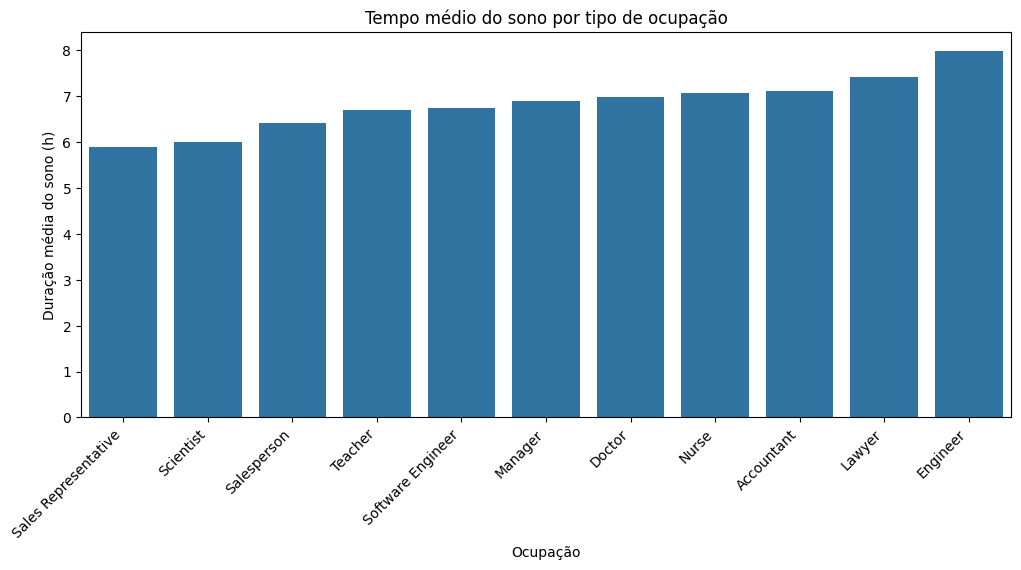

In [ ]:
#Tempo médio do sono por tipo de ocupação

plt.figure(figsize=(12, 5))
occupation_sleep = df.groupby("Occupation")["Sleep Duration"].mean().sort_values()
sns.barplot(x=occupation_sleep.index, y=occupation_sleep.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Duração média do sono (h)")
plt.xlabel("Ocupação")
plt.title("Tempo médio do sono por tipo de ocupação")
plt.show()

Os representantes de vendas e os cientistas são dos que dormem menos, cerca de 6h por noite.

Em contrapartida, Engenheiros e Advogados são os que dormem mais (>7h)

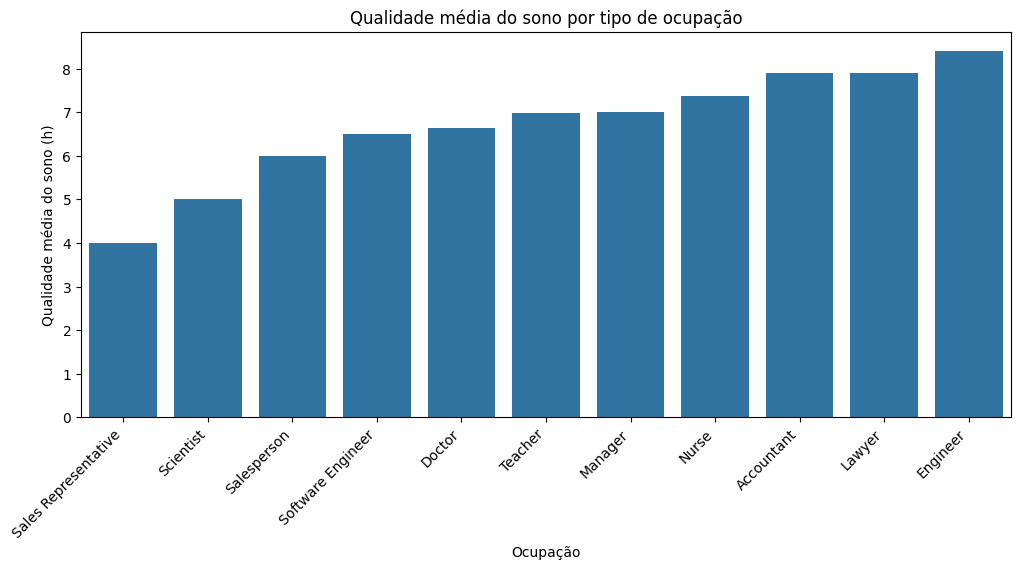

In [18]:
#Qualidade média do sono por ocupação

plt.figure(figsize=(12, 5))
occupation_sleep = df.groupby("Occupation")["Quality of Sleep"].mean().sort_values()
sns.barplot(x=occupation_sleep.index, y=occupation_sleep.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Qualidade média do sono (h)")
plt.xlabel("Ocupação")
plt.title("Qualidade média do sono por tipo de ocupação")
plt.show()

Observa-se que o gráfico de qualidade de sono se assemelha ao de duração de sono.

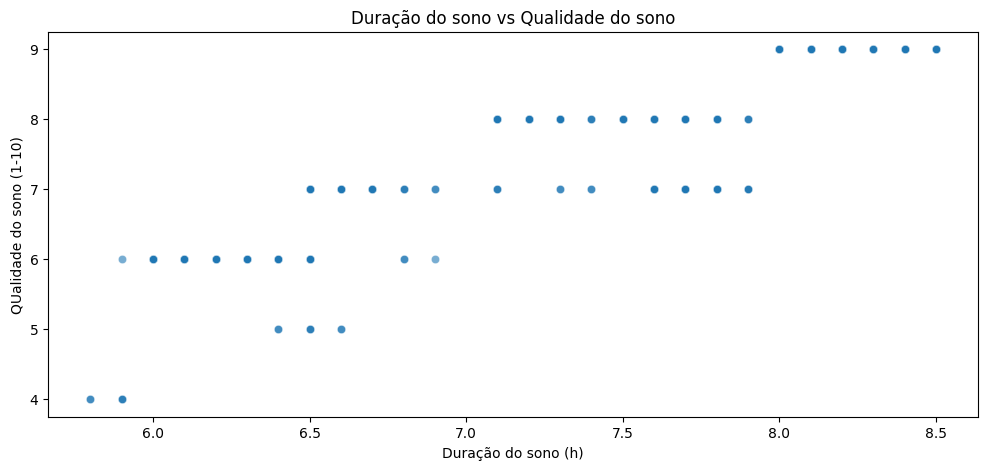

In [20]:
#Gráfico de relação emtre a qualidade do sono e a duração


plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Sleep Duration"], y=df["Quality of Sleep"], alpha=0.6)
plt.xlabel("Duração do sono (h)")
plt.ylabel("QUalidade do sono (1-10)")
plt.title("Duração do sono vs Qualidade do sono")
plt.show()

Observa-se que existe uma relação proporcional entre a duração do sono com a qualidade do sono, ou seja, pessoas que dormem uma quantidade maior tendem a ter uma maior qualidade no sono.

Entretanto, ainda existe uma faixa de qualidade do sono que abrange uma grande faixa de duração, ou seja, o fator duração do sono não é o único a impactar na qualidade.

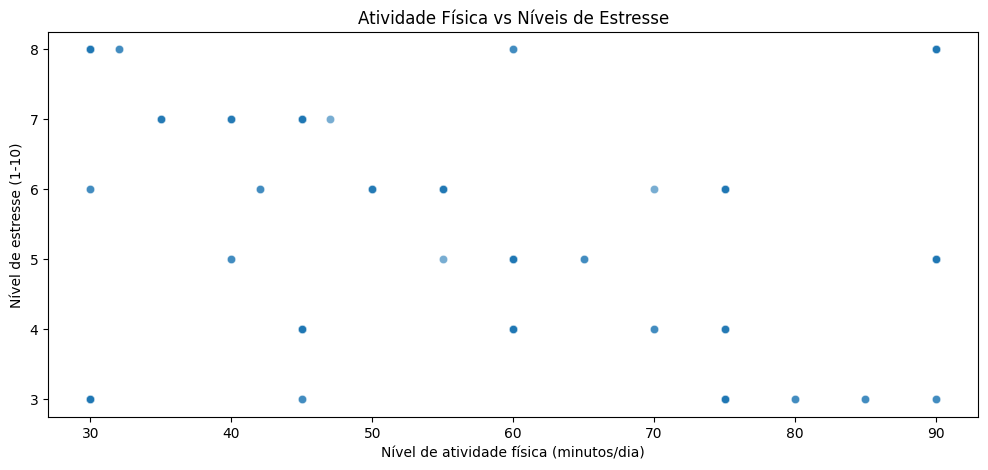

In [ ]:
#Relação entre a atividade fisica vs o nível de estresse

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Physical Activity Level"], y=df["Stress Level"], alpha=0.6)
plt.xlabel("Nível de atividade física (minutos/dia)")
plt.ylabel("Nível de estresse (1-10)")
plt.title("Atividade Física vs Níveis de Estresse")
plt.show()

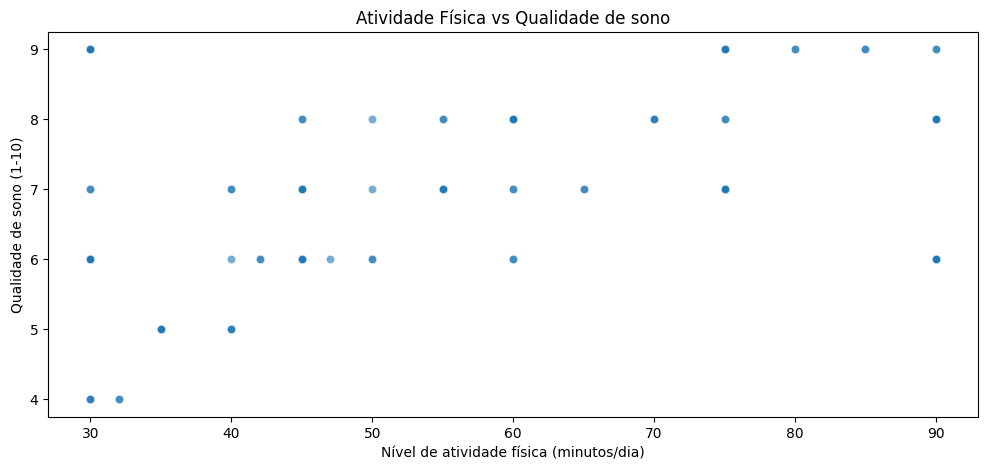

In [27]:
#Relação entre a atividade fisica vs qualiadde sono

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Physical Activity Level"], y=df["Quality of Sleep"], alpha=0.6)
plt.xlabel("Nível de atividade física (minutos/dia)")
plt.ylabel("Qualidade de sono (1-10)")
plt.title("Atividade Física vs Qualidade de sono")
plt.show()

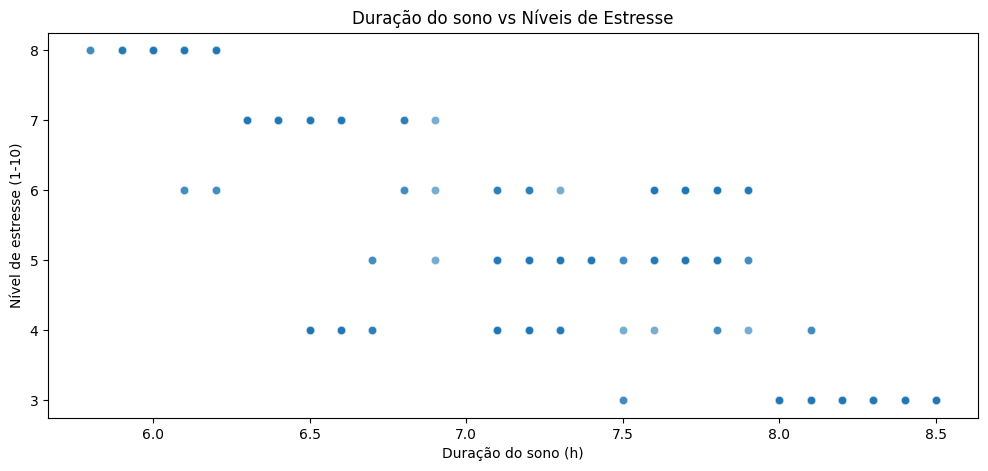

In [28]:
#Relação entre a duração do sono vs o nível de estresse

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Sleep Duration"], y=df["Stress Level"], alpha=0.6)
plt.xlabel("Duração do sono (h)")
plt.ylabel("Nível de estresse (1-10)")
plt.title("Duração do sono vs Níveis de Estresse")
plt.show()

Observa-se uma relação entre o nível de estresse é inversamente proporcional a duração do sono, ou seja, pessoas que dormem mais tendem a ter um nível de estresse menor.

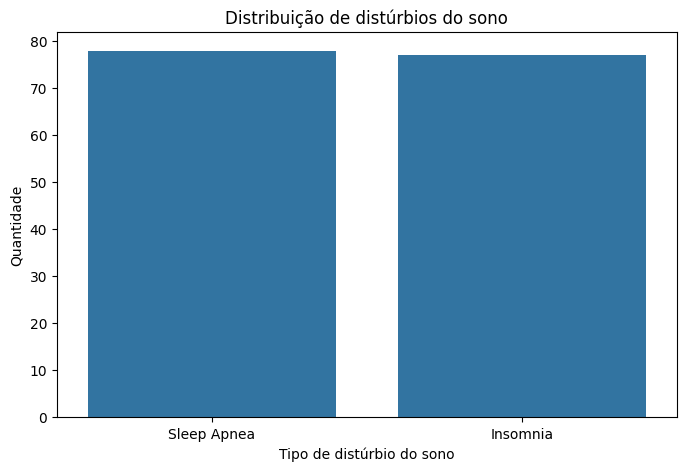

In [ ]:
#Quantidade de distúrbios por tipo  

plt.figure(figsize=(8, 5))
sns.countplot(x=df["Sleep Disorder"])
plt.xlabel("Tipo de distúrbio do sono")
plt.ylabel("Quantidade")
plt.title("Distribution of Sleep Disorders")
plt.show()

In [29]:
#salvar a base de dados tratados
df.to_csv("Sleep_health_and_lifestyle_dataset_pre_processado.csv")

MODELO DE PREDIÇÃO DE DISTÚRBIOS DO SONO